<a href="https://colab.research.google.com/github/edgeemer/hillel_ml_2025/blob/main/Unit%204.%20Linear%20regression%20%26%20logistic%20regression/homework_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import zipfile

# Open the ZIP file in read mode
with zipfile.ZipFile('materials.zip', 'r') as zip_ref:
    # Extract all files to a specific folder
    zip_ref.extractall('/content')

In [14]:
import os  # Модуль для взаємодії з операційною системою
import numpy as np  # Бібліотека для роботи з масивами даних
import pandas as pd  # Бібліотека для аналізу та обробки даних у форматі таблиць
import matplotlib.pyplot as plt  # Бібліотека для візуалізації даних

from sklearn.model_selection import KFold, StratifiedKFold  # Модулі для реалізації різних стратегій крос-валідації
from sklearn.linear_model import LogisticRegression  # Логістична регресія - модель класифікації
from sklearn.metrics import classification_report  # Метрики для оцінки якості класифікації

import warnings
warnings.filterwarnings(action="ignore")

## Data Load and Visualizations

In [3]:
df = pd.read_csv(os.path.join("/content", "mnist_train.csv"))  # Зчитуємо навчальні дані з CSV файлу
print(df.shape)  # Виводимо розмір таблиці
df.head()  # Виводимо перші декілька записів

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv(os.path.join("/content", "mnist_test.csv"))  # Зчитуємо тестові дані з CSV файлу
print(df_test.shape)  # Виводимо розмір таблиці тестових даних
df_test.head()  # Виводимо перші декілька записів тестових даних

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


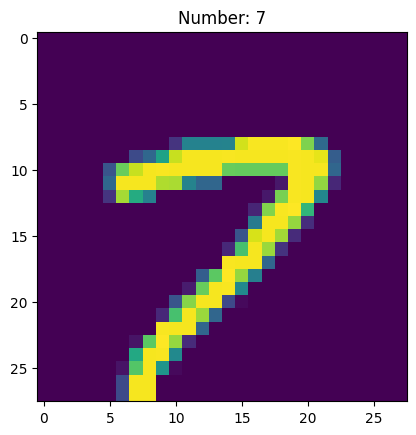

In [5]:
idx = 123  # Індекс зразка, який хочемо візуалізувати
label = df.iloc[idx, 0]  # Отримуємо мітку (цифру) для вибраного зразка
sample = df.iloc[idx, 1:]  # Отримуємо піксельні дані для вибраного зразка
sample = np.reshape(sample, (28, 28))  # Перетворюємо плоский масив у двовимірний зображення розміром 28x28

plt.title(f"Number: {label}")  # Встановлюємо заголовок з міткою (цифрою) зразка
plt.imshow(sample);  # Візуалізуємо зразок

In [6]:
def sample_as_img(sample):
    label = sample[0]  # Отримуємо мітку (цифру)
    img = np.reshape(sample[1:], (28, 28))  # Перетворюємо плоский масив у двовимірний зображення розміром 28x28
    return img, label

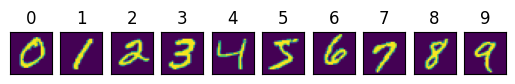

In [7]:
fix, axes = plt.subplots(ncols=10)  # Створюємо сітку з 10 графіками в одному рядку
for i in range(10):
    sample = df[df["label"] == i].iloc[0]  # Вибираємо перший зразок для кожної цифри
    img, label = sample_as_img(sample)  # Отримуємо зображення та мітку для поточного зразка
    ax = axes[i]  # Вибираємо поточний графік з сітки
    ax.imshow(img)  # Візуалізуємо зображення
    ax.set_title(label)  # Встановлюємо заголовок графіку з міткою (цифрою)
    # Приховуємо мітки маркерів X та Y
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    # Приховуємо позначки маркерів X та Y
    ax.set_xticks([])
    ax.set_yticks([])

#### TODO: Data Check

> Проаналізуйте дані - візуалізуйте розподіл класів (таргета), візуалізуйте приклади класів.

Розподіл класів - bar plot, приклади класів - за основу взяв наведене рішення вище та модифікував його для виведення Н кількості прикладів класів.

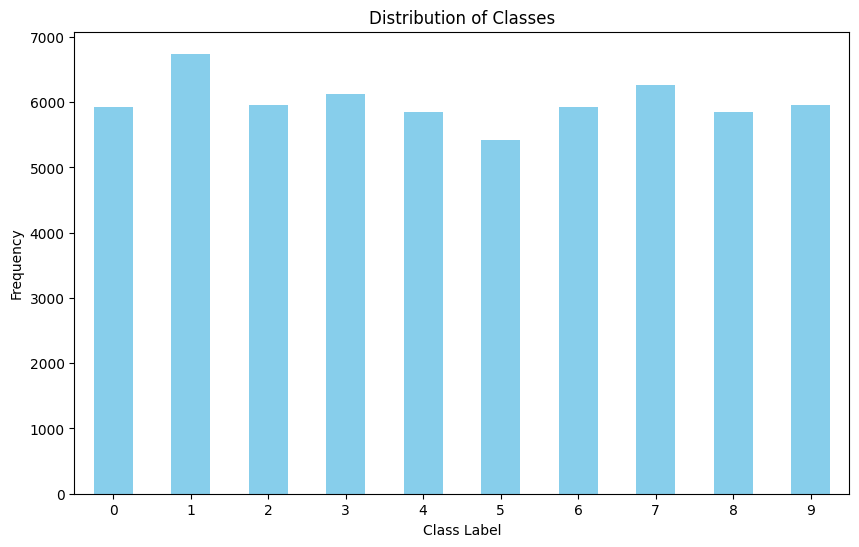

In [8]:
# Visualize the distribution of classes (target)
plt.figure(figsize=(10, 6))
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

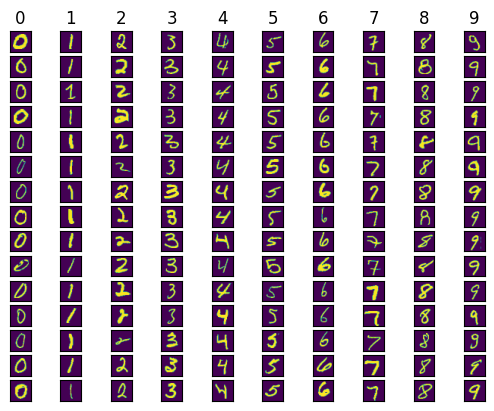

In [9]:
fix, axes = plt.subplots(ncols=10, nrows=15)
for i in range(10):
    samples = df[df["label"] == i].sample(15, random_state=42)  # Вибираємо n зразків для кожного класу
    for j, sample in enumerate(samples.values):  # Ітеруємося по зразках
        img, label = sample_as_img(sample)  # Використовуємо існуючу функцію для отримання обробленого зображення та класу
        ax = axes[j, label]  # Вибираємо комірку j класу label
        ax.imshow(img)  # Виводимо зображення в комірку
        ax.set_title(label if j == 0 else "") # Заголовок для колонки + 'милиця' для зображень після першого
        # Приховуємо мітки маркерів X та Y
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)
        # Приховуємо позначки маркерів X та Y
        ax.set_xticks([])
        ax.set_yticks([])

## Modeling & Evaluation

#### TODO

На основі розподілу даних оберіть метрику яку оптимізуватимете (accuracy, precision, recall, $F_1$) і напишіть чому саме такий вибір.

Знайдіть модель яка найкраще б працювала на тестових даних (спробуйте різні значення для параметру `penalty : {‘l1’, ‘l2’, ‘elasticnet’, None}`). Напишіть метрики моделей на тестових даних які перевіряли.

> На основі розподілу даних оберіть метрику яку оптимізуватимете (accuracy, precision, recall, F1) і напишіть чому саме такий вибір.

Думаю, що основний параметр для оптимізації - accuracy. Чому:
- З візуалізації класів у нас збалансований датасет.
- Всі класи мають однакову важливість (equally important).
- Контекст нашого завдання не зазначає критичність FP/FN, тому не precision (FP критичні) /recall (FN критичні).
- accuracy зазвичай це 'класичний' вибір через легкість інтерпритації та оптимізації.
- З F1-Score трішки цікавіше, але як я зрозумів, це вже коли є дисбаланс в початкових даних та/або precision/recall важливість різна для класів. Як мінімум, додатковий complexity layer, який не здається потрібним для зазначеної задачі.

> Знайдіть модель яка найкраще б працювала на тестових даних (спробуйте різні значення для параметру penalty : {‘l1’, ‘l2’, ‘elasticnet’, None}). Напишіть метрики моделей на тестових даних які перевіряли.

Для того щоб запустити тести була зроблена модифікація параметра `solver`на `saga`, бо стандартний `lbfgs` не підтримує `L1`/`ElasticNet`. Також для `ElasticNet` був введений обов'язковий параметр `l1_ratio` із рівноцінними weights регуляризації між `l1`/`l2` із значенням 0.5 та "максимально зміщеним" у бік `l2` із значенням 0.0 та у бік `l1` із значенням 1.0, щоб дізнатися вплив на результат overfitting/sparsity.


Результати показують, що всі чотири конфігурації дали однакову підсумкову точність (accuracy ≈ 0.93) і дуже близькі значення precision, recall та f1-score по кожному класу.

Accuracy, macro/weighted F1-score ідентичні для всіх трьох конфігурацій `ElasticNet` => регулярізація ElasticNet суттєво не впливає на продуктивність цього набору даних => набір даних добре структурований і збалансований.

Нижче таблиця з узагальненими метриками:

| Penalty  |	Accuracy |	Macro F1 |	Weighted F1 |
| :------: | :------:  | :-------: | :----------: |
| l1	     |   0.93	   | 0.93      |	 0.93       |
|l2		     |   0.93    |	0.92     |       0.93   |
|elasticnet (1.0) |	0.93     |	0.93	   |0.93          |
|elasticnet (0.5) |	0.93     |	0.93	   |0.93          |
|elasticnet (0.0) |	0.93     |	0.93	   |0.93          |
|None      |	0.93     |	0.92	   |0.93          |

З огляду на наведені метрики, відмінності між цими варіантами мінімальні й не вказують на явного переможця. Якщо необхідно обрати одну модель, мені здається доцільним обрати l2 через її швидкодію та стійкість.

Якщо важливе збереження рідкісних (sparce) ознак, варто розглянути l1 або elasticnet.

Якщо ж регуляризацію застосовувати взагалі не потрібно, можна використати None.

In [10]:
# Побудова наборів даних
X = df.iloc[:, 1:].values / 255.0  # Конвертація значень пікселів з діапазону [0..255] до [0,1]
y = df.iloc[:, 0].values  # Вибір міток класів (цифр)

X_test = df_test.iloc[:, 1:].values / 255.0  # Конвертація значень пікселів тестового набору даних з [0..255] до [0,1]
y_test = df_test.iloc[:, 0].values  # Вибір міток класів для тестового набору даних

In [11]:
n_folds = 5  # Кількість фолдів для крос-валідації

for fold_idx, (train_idxs, valid_idxs) in enumerate(KFold(n_splits=n_folds).split(X)):
    x_train, y_train = X[train_idxs], y[train_idxs]  # Отримання тренувального набору
    x_valid, y_valid = X[valid_idxs], y[valid_idxs]  # Отримання валідаційного набору
    model = LogisticRegression(penalty=None)  # Створення моделі логістичної регресії
    model.fit(x_train, y_train)  # Навчання моделі на тренувальних даних
    y_pred = model.predict(x_valid)  # Прогнозування на валідаційних даних
    report = classification_report(y_valid, y_pred)  # Оцінка якості класифікації на валідаційних даних
    print(f"\n[Fold {fold_idx+1}/{n_folds}]")  # Вивід номера фолду
    print(report)  # Вивід звіту про класифікацію для поточного фолду


[Fold 1/5]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1206
           1       0.95      0.97      0.96      1351
           2       0.91      0.90      0.91      1176
           3       0.89      0.89      0.89      1228
           4       0.92      0.94      0.93      1184
           5       0.91      0.88      0.89      1048
           6       0.94      0.96      0.95      1208
           7       0.95      0.92      0.94      1279
           8       0.89      0.85      0.87      1127
           9       0.90      0.92      0.91      1193

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000


[Fold 2/5]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1175
           1       0.96      0.97      0.96      1381
           2       0.90      0.88      0.89      1171


In [12]:
penalty_modes = ['l1', 'l2', 'elasticnet', None]

models = {}

for penalty_mode in penalty_modes:
  if penalty_mode == 'elasticnet':
    model = LogisticRegression(penalty=penalty_mode, solver='saga', l1_ratio=0.5)
  elif penalty_mode == 'l1':
    model = LogisticRegression(penalty=penalty_mode, solver='saga')
  else:
    model = LogisticRegression(penalty=penalty_mode)

  model.fit(X, y)
  models[penalty_mode] = model

for penalty_model, model in models.items():
  print(f"\n{penalty_model=}")
  print(classification_report(y_test, model.predict(X_test)))  # Оцінка якості класифікації на тестових даних та виведення звіту


penalty_model='l1'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000


penalty_model='l2'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90     

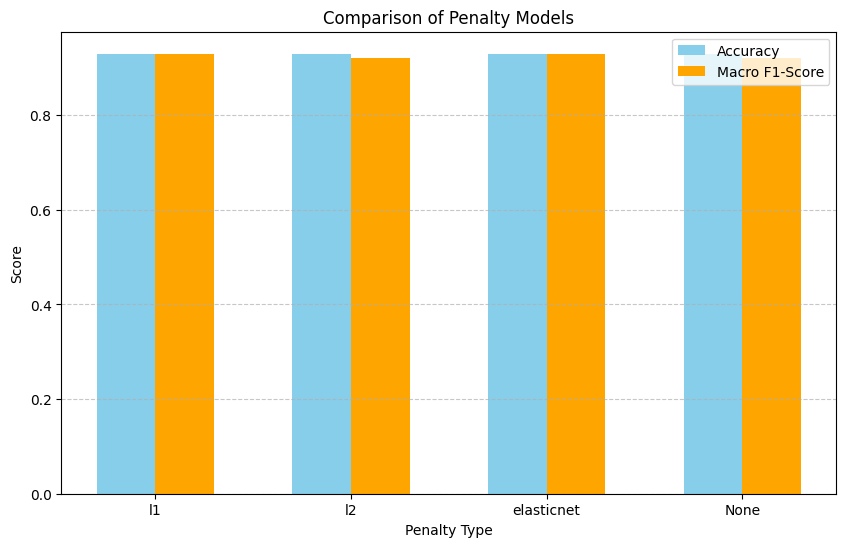

In [23]:
models = {}

for penalty_mode, l1_ratio in zip(['elasticnet']*3, [0.0, 0.5, 1.0]):
  model = LogisticRegression(penalty=penalty_mode, solver='saga', l1_ratio=l1_ratio)

  model.fit(X, y)
  models[f"{penalty_mode}_l1_ratio_{l1_ratio}"] = model

for penalty_model, model in models.items():
  print(f"\n{penalty_model=}")
  print(classification_report(y_test, model.predict(X_test)))  # Оцінка якості класифікації на тестових даних та виведення звіту


penalty_model='elasticnet_l1_ratio_0.0'
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000


penalty_model='elasticnet_l1_ratio_0.5'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1